## **Name:** Affan Zulfiqar

---

## **Reg No:** B22F0144AI050
---
## **Course:** DIP (Lab 9)
---
## **Section:** AI22F-Blue


## **TASK 1:**

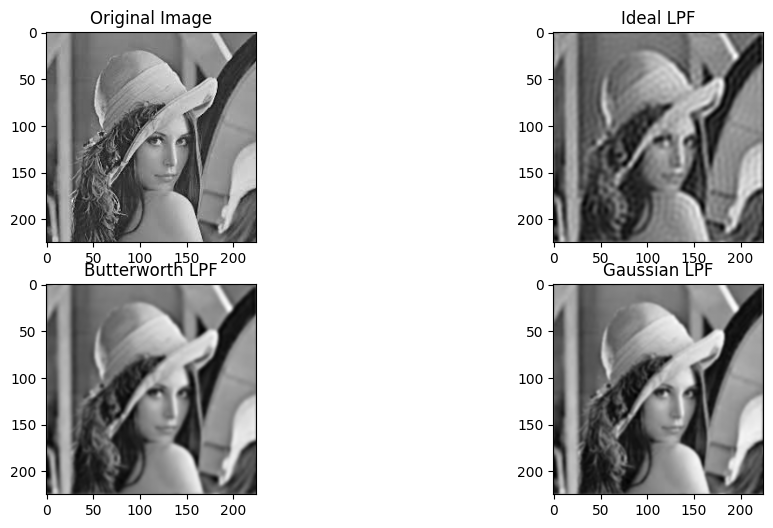

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ideal_low_pass_filter(shape, cutoff):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    mask = np.zeros((rows, cols), np.uint8)
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center[1]) ** 2 + (Y - center[0]) ** 2)
    mask[distance <= cutoff] = 1
    return mask

def butterworth_low_pass_filter(shape, cutoff, order):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center[1]) ** 2 + (Y - center[0]) ** 2)
    mask = 1 / (1 + (distance / cutoff) ** (2 * order))
    return mask

def gaussian_low_pass_filter(shape, cutoff):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center[1]) ** 2 + (Y - center[0]) ** 2)
    mask = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return mask

def apply_filter(image, filter_mask):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    filtered_dft = dft_shift * filter_mask[..., np.newaxis]
    dft_inv_shift = np.fft.ifftshift(filtered_dft)
    img_back = cv2.idft(dft_inv_shift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    return img_back

# Load grayscale image
image = cv2.imread('gray.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape

# Define cutoff frequency and order
cutoff = 30
order = 2  # For Butterworth filter

# Create filters
ilpf = ideal_low_pass_filter((rows, cols), cutoff)
blpf = butterworth_low_pass_filter((rows, cols), cutoff, order)
glpf = gaussian_low_pass_filter((rows, cols), cutoff)

# Apply filters
ilpf_result = apply_filter(image, ilpf)
blpf_result = apply_filter(image, blpf)
glpf_result = apply_filter(image, glpf)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(ilpf_result, cmap='gray'), plt.title('Ideal LPF')
plt.subplot(2, 2, 3), plt.imshow(blpf_result, cmap='gray'), plt.title('Butterworth LPF')
plt.subplot(2, 2, 4), plt.imshow(glpf_result, cmap='gray'), plt.title('Gaussian LPF')
plt.show()


## **TASK 2:**

<ipython-input-12-2e9651b43286>:29: RuntimeWarning: divide by zero encountered in scalar divide
  mask[i, j] = 1 / (1 + (cutoff / distance) ** (2 * order))


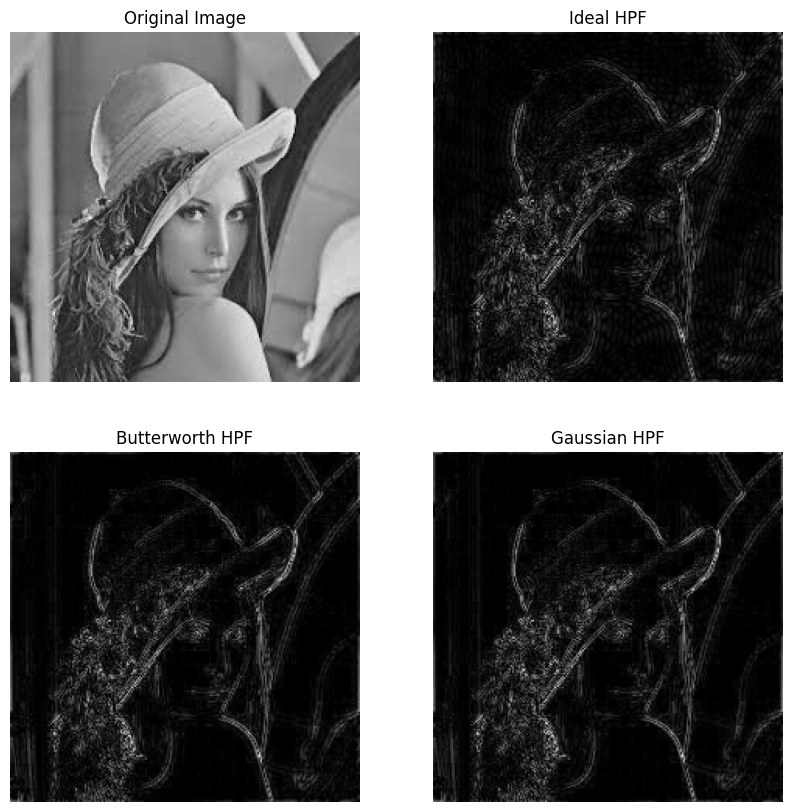

In [12]:
def apply_fourier_transform(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    return dft_shift

def apply_inverse_fourier_transform(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_back = np.fft.ifft2(dft_ishift)
    img_back = np.abs(img_back)
    return img_back

def ideal_high_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) < cutoff:
                mask[i, j] = 0
    return mask

def butterworth_high_pass_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (cutoff / distance) ** (2 * order))
    return mask

def gaussian_high_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 - np.exp(-(distance**2) / (2 * (cutoff**2)))
    return mask

image = cv2.imread("gray.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
dft_shift = apply_fourier_transform(image)

cutoff = 30
order = 2  # For Butterworth filter

ihpf = ideal_high_pass_filter(image.shape, cutoff)
bhpf = butterworth_high_pass_filter(image.shape, cutoff, order)
ghpf = gaussian_high_pass_filter(image.shape, cutoff)

ihpf_result = dft_shift * ihpf
bhpf_result = dft_shift * bhpf
ghpf_result = dft_shift * ghpf

image_ihpf = apply_inverse_fourier_transform(ihpf_result)
image_bhpf = apply_inverse_fourier_transform(bhpf_result)
image_ghpf = apply_inverse_fourier_transform(ghpf_result)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(image, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(image_ihpf, cmap="gray")
axes[0, 1].set_title("Ideal HPF")
axes[0, 1].axis("off")

axes[1, 0].imshow(image_bhpf, cmap="gray")
axes[1, 0].set_title("Butterworth HPF")
axes[1, 0].axis("off")

axes[1, 1].imshow(image_ghpf, cmap="gray")
axes[1, 1].set_title("Gaussian HPF")
axes[1, 1].axis("off")

plt.show()


## **Task 3:**

Original Energy: 45156338105624.99
Energy Retention (Ideal LPF): 98.81%
Energy Retention (Butterworth LPF): 98.30%
Energy Retention (Gaussian LPF): 98.03%


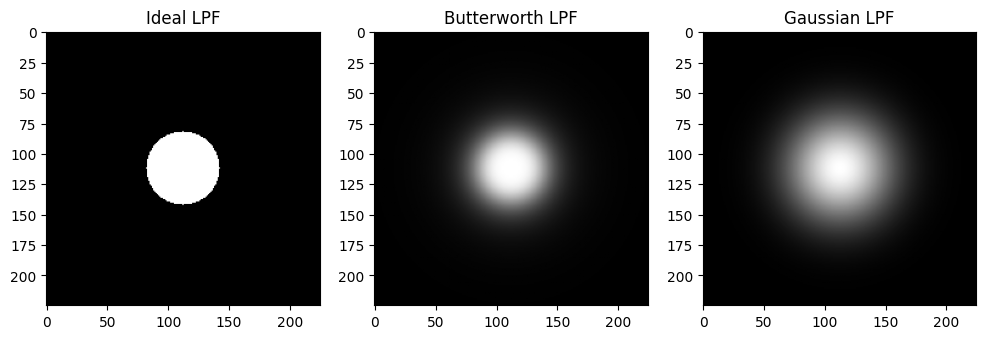

In [19]:
def apply_fourier_transform(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = np.log(1 + np.abs(dft_shift))
    return dft_shift, magnitude_spectrum

def apply_filter(fshift, filter_):
    return fshift * filter_

def compute_energy(spectrum):
    return np.sum(np.abs(spectrum) ** 2)

def compute_energy_retention(original_energy, filtered_energy):
    return (filtered_energy / original_energy) * 100

def ideal_low_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= cutoff:
                mask[i, j] = 1
    return mask

def butterworth_low_pass_filter(shape, cutoff, order=2):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (distance / cutoff) ** (2 * order))
    return mask

def gaussian_low_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    d = np.sqrt((x - ccol) ** 2 + (y - crow) ** 2)
    mask = np.exp(-(d ** 2) / (2 * (cutoff ** 2)))
    return mask

# Load image
image = cv2.imread('gray.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
fshift, magnitude_spectrum = apply_fourier_transform(image)

# Compute original energy before filtering
original_energy = compute_energy(fshift)

# Define cutoff frequency
cutoff = 30

# Generate filters
ideal_filter = ideal_low_pass_filter(image.shape, cutoff)
butterworth_filter = butterworth_low_pass_filter(image.shape, cutoff, order=2)
gaussian_filter = gaussian_low_pass_filter(image.shape, cutoff)

# Apply filters
ideal_filtered = apply_filter(fshift, ideal_filter)
butterworth_filtered = apply_filter(fshift, butterworth_filter)
gaussian_filtered = apply_filter(fshift, gaussian_filter)

# Compute energy after filtering
ideal_energy = compute_energy(ideal_filtered)
butterworth_energy = compute_energy(butterworth_filtered)
gaussian_energy = compute_energy(gaussian_filtered)

# Compute energy retention
E_ideal = compute_energy_retention(original_energy, ideal_energy)
E_butterworth = compute_energy_retention(original_energy, butterworth_energy)
E_gaussian = compute_energy_retention(original_energy, gaussian_energy)

# Display results
print(f"Original Energy: {original_energy:.2f}")
print(f"Energy Retention (Ideal LPF): {E_ideal:.2f}%")
print(f"Energy Retention (Butterworth LPF): {E_butterworth:.2f}%")
print(f"Energy Retention (Gaussian LPF): {E_gaussian:.2f}%")

# Plot the filters
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(ideal_filter, cmap='gray'), plt.title('Ideal LPF')
plt.subplot(132), plt.imshow(butterworth_filter, cmap='gray'), plt.title('Butterworth LPF')
plt.subplot(133), plt.imshow(gaussian_filter, cmap='gray'), plt.title('Gaussian LPF')
plt.show()
